## Задание:
#### Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)
#### Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:
<ul>
    <li>обработку пропусков в данных;</li>
    <li>кодирование категориальных признаков;</li>
    <li>масштабирование данных.</li>
</ul>

In [2]:
# Импорт библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [3]:
data = pd.read_csv('android_devices.csv')
data.shape

(14546, 4)

In [8]:
data.head()

,Retail Branding,Marketing Name,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A


In [5]:
data.isnull().sum()

Retail Branding       4
Marketing Name     1171
Device                0
Model                 0
dtype: int64

In [6]:
data.describe()

,Retail Branding,Marketing Name,Device,Model
count,14542,13375,14546,14546
unique,605,8631,9830,12883
top,Samsung,Galaxy S3,mt5880,LG-P970
freq,1762,38,59,23


In [7]:
data.dtypes

Retail Branding    object
Marketing Name     object
Device             object
Model              object
dtype: object

# 1. Обработка пропусков в данных

In [10]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((14546, 4), (14546, 2))

In [12]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((14546, 4), (13375, 4))

In [11]:
data.head()

,Retail Branding,Marketing Name,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A


In [25]:
# Заполнение всех пропущенных значений нулями
# В данном случае это некорректно, так как нулями заполняются в том числе категориальные колонки
data_new_3 = data.fillna(0)
data_new_3[:10]

,Retail Branding,Marketing Name,Device,Model
0,0,0,AD681H,Smartfren Andromax AD681H
1,0,0,FJL21,FJL21
2,0,0,T31,Panasonic T31
3,0,0,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A
5,7Eleven,IN265,IN265,IN265
6,A.O.I. ELECTRONICS FACTORY,A.O.I.,TR10CS1_11,TR10CS1
7,AG Mobile,AG BOOST 2,BOOST2,E4010
8,AG Mobile,AG Flair,AG_Flair,Flair
9,AG Mobile,AG Go Tab Access 2,AG_Go_Tab_Access_2,AG_Go_Tab_Access_2


In [14]:
data_new_3.isnull().sum()

Retail Branding    0
Marketing Name     0
Device             0
Model              0
dtype: int64

# 2. Кодирование категориальных признаков;

In [73]:
c = 'c6' #c6

In [74]:
cat_enc = pd.DataFrame({c:data_new_3.T[int(c[1])]})

In [75]:
cat_enc

,c6
Retail Branding,A.O.I. ELECTRONICS FACTORY
Marketing Name,A.O.I.
Device,TR10CS1_11
Model,TR10CS1


In [76]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [82]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc[c])

In [83]:
cat_enc[c].unique()

array(['A.O.I. ELECTRONICS FACTORY', 'A.O.I.', 'TR10CS1_11', 'TR10CS1'],
      dtype=object)

In [84]:
np.unique(cat_enc_le)

array([0, 1, 2, 3])

In [85]:
le.inverse_transform([0, 1, 2, 3])

array(['A.O.I.', 'A.O.I. ELECTRONICS FACTORY', 'TR10CS1', 'TR10CS1_11'],
      dtype=object)

# 3. Масштабирование данных

In [86]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [89]:
data = pd.read_csv('train.csv')

In [90]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['SalePrice']])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


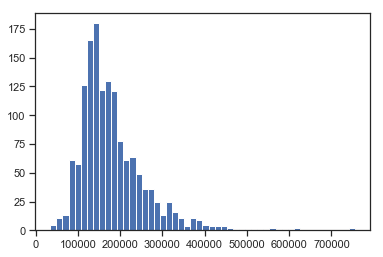

In [91]:
plt.hist(data['SalePrice'], 50)
plt.show()

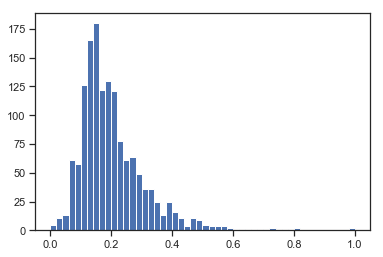

In [92]:
plt.hist(sc1_data, 50)
plt.show()